In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# The Growth of Israeli Settlements in the Westbank

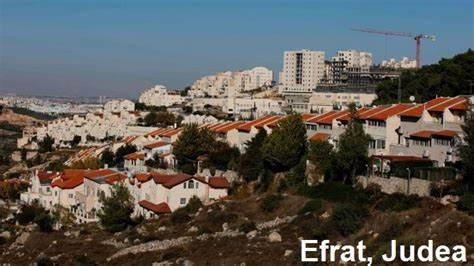

In [27]:
from IPython.display import Image
Image(filename='C:\\Users\\cylia\\OneDrive\\Afbeeldingen\\Schermopnamen\\Efrat.jpg')


#![Efrat.jfif](attachment:Efrat.jfif)

### Introduction

Since the first settlement was built in 1967, many more have followed. In 2013 the 146th settlement was built. In this analysis, I will look at the growth of the different settlements between 2000 and 2015 to get some insight on a possible correlation between the date of establishment and its growth in the given period. My hypothesis is that the later established settlements grow faster than the earlier onces. Causes for this might be faster building, improved roads and easier ways to communicate, but this will not be addressed in this analysis.

In order to test the hypothesis, I will compare the average population growth between 2000 and 2015 of each settlement in comparison with the date of an establishment. The difference in population size between 2000 and 2015 is not per definition growth, it could also be a downsizing: the demographic numbers are not necessarily a linear regression. In addition, I will group the settlements by location to determine whether or not location is of influence on the growth of a settlement. I will end this analysis with a prediction of the size of the settlements in 2025. To summarize, the different steps are:

### Dataset

For this analysis this dataset was used: https://www.kaggle.com/datasets/ilcbs/israeli-settlements?resource=download

**Used for analysis**
- Name of the settlement
- Year of estalishment
- Westbank barrier
- Population in 2015
- Population in 2010
- Population in 2005
- Population in 200

**Not used in the analysis**
- Name settlement in Hebrew
- Latitude
- Longitude
- The regional council of which the settlement is a part

### Research methods

- Removing all NaN's
- Calculating the average growth per settlement between 2000 and 2015
- Plotting the growth against year of establishment
- Plotting the growth against location of the settlement
- Using machine learning to predict settlement population in 2025

In [28]:
df = pd.read_csv('Israeli Settlements.csv', usecols= [ 'Year Established', '2000 Population', '2005 Population', '2010 Population', '2015 Population'])
df = df.dropna(subset=['Year Established', '2000 Population', '2005 Population', '2010 Population', '2015 Population'])


Table of the population numbers between 2015 and 2000 (descending) by year of establishment

In [29]:
display(df.sort_values(by='Year Established', ascending=True))

,Year Established,2015 Population,2010 Population,2005 Population,2000 Population
65,1967,1071.0,804.0,422.0,427.0
6,1968,133.0,169.0,166.0,164.0
84,1968,471.0,400.0,362.0,306.0
58,1968,394.0,306.0,271.0,260.0
121,1969,915.0,606.0,364.0,265.0
...,...,...,...,...,...
11,1990,1709.0,1553.0,1127.0,785.0
118,1991,1974.0,1262.0,827.0,504.0
93,1996,64179.0,48639.0,30484.0,16400.0
86,1998,2700.0,2509.0,1804.0,768.0


In [30]:

X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values

Random sample of the dataset to show the population growth of the settlements between 2000 and 2015

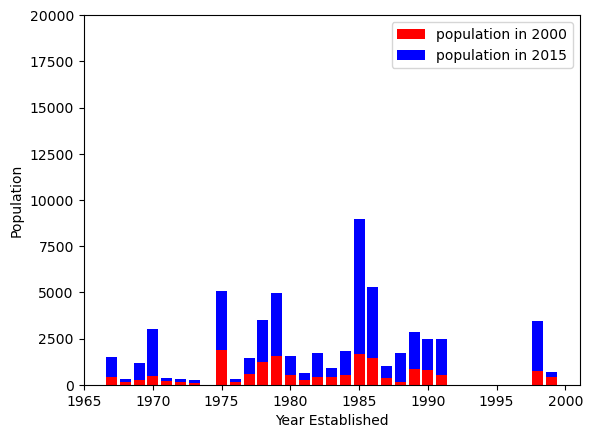

In [31]:
df_filtered = df[df['2015 Population'] < 20000]
grouped = df_filtered.groupby('Year Established')

sample_df = grouped.apply(lambda x: x.sample(1))

x = sample_df['Year Established'] = sample_df['Year Established'].astype(int)
y1 = sample_df['2000 Population']
y2 = sample_df['2015 Population']

plt.bar(x, y1, color='red', label='population in 2000')
plt.bar(x, y2, bottom=y1, color='blue', label='population in 2015')

plt.ylim(0, 20000)

plt.xlabel('Year Established')
plt.ylabel('Population')
plt.legend()
plt.show()

This bar chart shows that most of the settlements from this sample have doubled their population. Some are multiplied by 3 or even 4. This example rejects the hypothesis that later established settlements grow more and faster. 

This table has an extra column thats shows the mean growth per settlement between 2000 and 2015

In [32]:
df['growth_mean'] = (df['2015 Population'] - df['2000 Population']) / df['2000 Population']

average_growth = df['growth_mean'].mean()

display(df.sort_values(by='Year Established', ascending=True))

,Year Established,2015 Population,2010 Population,2005 Population,2000 Population,growth_mean
65,1967,1071.0,804.0,422.0,427.0,1.508197
6,1968,133.0,169.0,166.0,164.0,-0.189024
84,1968,471.0,400.0,362.0,306.0,0.539216
58,1968,394.0,306.0,271.0,260.0,0.515385
121,1969,915.0,606.0,364.0,265.0,2.452830
...,...,...,...,...,...,...
11,1990,1709.0,1553.0,1127.0,785.0,1.177070
118,1991,1974.0,1262.0,827.0,504.0,2.916667
93,1996,64179.0,48639.0,30484.0,16400.0,2.913354
86,1998,2700.0,2509.0,1804.0,768.0,2.515625


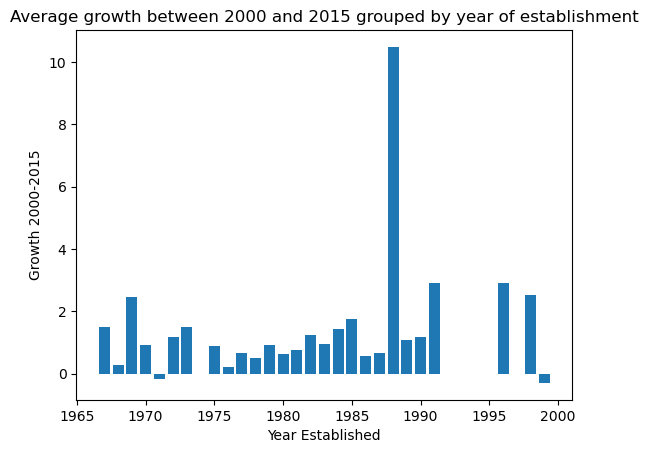

In [8]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('Israeli Settlements.csv')

df['growth_mean'] = (df['2015 Population'] - df['2000 Population']) / df['2000 Population']

average_growth = df['growth_mean'].mean()

# Group the data by year of establishment
grouped = df.groupby('Year Established')

# Calculate the mean growth for each year
mean_growth = grouped['growth_mean'].mean()

# Plot the bar chart
plt.bar(  mean_growth.index, mean_growth.values,)

# Label the x-axis
plt.xlabel('Year Established')

# Label the y-axis
plt.ylabel('Growth 2000-2015')
plt.title('Average growth between 2000 and 2015 grouped by year of establishment')

# Show the chart
plt.show()


The plot shows that the later established settlements tend to grow more than the earlier ones. Settlements established between 1975 and 1985 show a comparable growth, although this plot doesn't show how many settlements were established each year (could be more than one).

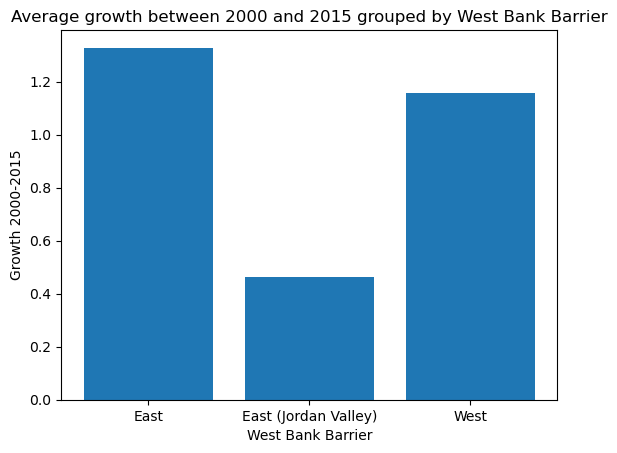

In [33]:


# Load the data into a Pandas DataFrame
df = pd.read_csv('Israeli Settlements.csv')

df['growth_mean'] = (df['2015 Population'] - df['2000 Population']) / df['2000 Population']

average_growth = df['growth_mean'].mean()


# Group the data by year of establishment
grouped = df.groupby('West Bank Barrier')

# Calculate the mean growth for each year
mean_growth = grouped['growth_mean'].mean()

# Plot the bar chart
plt.bar(  mean_growth.index, mean_growth.values,)

# Label the x-axis
plt.xlabel('West Bank Barrier')


# Label the y-axis
plt.ylabel('Growth 2000-2015')
plt.title('Average growth between 2000 and 2015 grouped by West Bank Barrier')

# Show the chart
plt.show()

This histogram show that if a settlement is located in the Easter or Wester part of the Westbank does not seem to influence the growth of the population 

In [44]:
df = pd.read_csv('Israeli Settlements.csv', usecols= ['2000 Population', '2005 Population', '2010 Population', '2015 Population'])
df = df.dropna(subset=[ '2000 Population', '2005 Population', '2010 Population', '2015 Population'])

In [45]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Predicted population in 2015 of the training set versus the actual population (test set) in 2015 shows a good fit. 

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
result_testset = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

display(result_testset)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [39]:
df2 = pd.DataFrame(result_testset, columns=['actual population 2015', 'predicted population in 2015'])
df2 = df2.astype(int)
display(df2)


,actual population 2015,predicted population in 2015
0,257,611
1,373,385
2,461,504
3,177,361
4,697,560
5,556,784
6,14545,15600
7,826,785
8,654,481
9,150,113


In [ ]:
df = pd.read_csv('Israeli Settlements.csv', usecols= [ 'Name','Year Established', '2000 Population', '2005 Population', '2010 Population', '2015 Population'])
df = df.dropna(subset=['Name','Year Established', '2000 Population', '2005 Population', '2010 Population', '2015 Population'])
#display(df.sort_values(by='Year Established', ascending=True)[['Name', 'Year Established', '2015 Population','Predicted Population 2025']])
display(df[['Name', 'Year Established', '2015 Population','Predicted Population 2025']])
# Create a dataframe of input features for the year 2025
X_future = pd.DataFrame({'2000 Population': df['2000 Population'], '2010 Population': df['2010 Population'], '2015 Population': df['2015 Population']})

# Use the trained model to make predictions for the year 2025
y_future = regressor.predict(X_future)

# Create a new column for the predicted population in 2025

df['Predicted Population 2025'] = y_future
df['Predicted Population 2025'] = df['Predicted Population 2025'].astype(int)




In [20]:
#display(df.sort_values(by='Year Established', ascending=True)[['Name', 'Year Established', '2015 Population','Predicted Population 2025']])
display(df.head(len(df[['Name', 'Year Established', '2015 Population','Predicted Population 2025']])))

,Name,Year Established,2015 Population,Predicted Population 2025
0,Adora,1984,404.0,509
1,Alei Zahav,1982,1300.0,1720
2,Alfei Menashe,1983,7638.0,7808
3,Almog,1977,207.0,259
4,Almon (Anatot),1982,1286.0,1489
...,...,...,...,...
141,Yafit,1980,149.0,205
142,Yakir,1981,1863.0,2168
143,Yitav,1970,279.0,387
144,Yitzhar,1983,1380.0,1646


Prediction of the population size per settlement in 2025 based on the population between 2000 and 2015 (in alfabetic order).

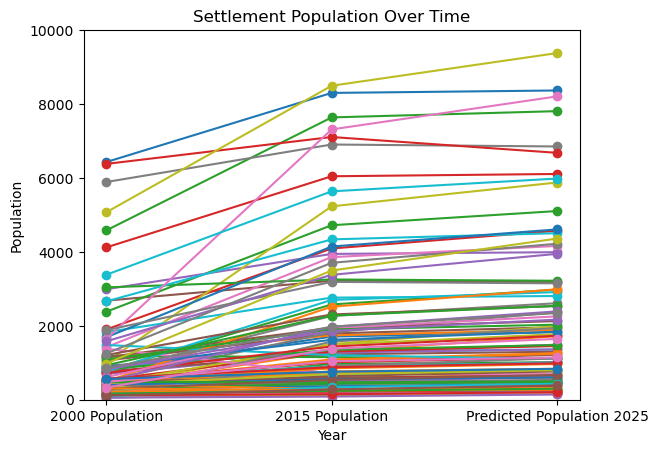

In [18]:


# Create a figure and axis
fig, ax = plt.subplots()

# Plot the populations
ax.plot(df[['2000 Population','2015 Population', 'Predicted Population 2025']].T, marker='o')

# Set the y limit
ax.set_ylim(0, 10000)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Settlement Population Over Time')



# Show the plot
plt.show()

This plot shows that if the prediction is right, the growth of the population per settlement is moderate. There are only a few settlements that are expected to expand with serieus numbers. However, the predicted growth is soley based on the growth between 2000 and 2015 and  not on external influences like politcal desicions, for instance to stop giving permission to build houses, numbers of immigrants to Israel or rising housing prices within the green line. To give a better view of the growth of the Israeli settlements, more variables need to be taken into account. 